In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# Read the data
df = pd.read_csv('allGames.csv')

# Cut off the first 21,294 rows, which include limited stats from before things like rebounds and steals were recorded
# All stats tracked in 1985, so we start our data here
df = df[21294:]
print(df.shape)

(41073, 54)


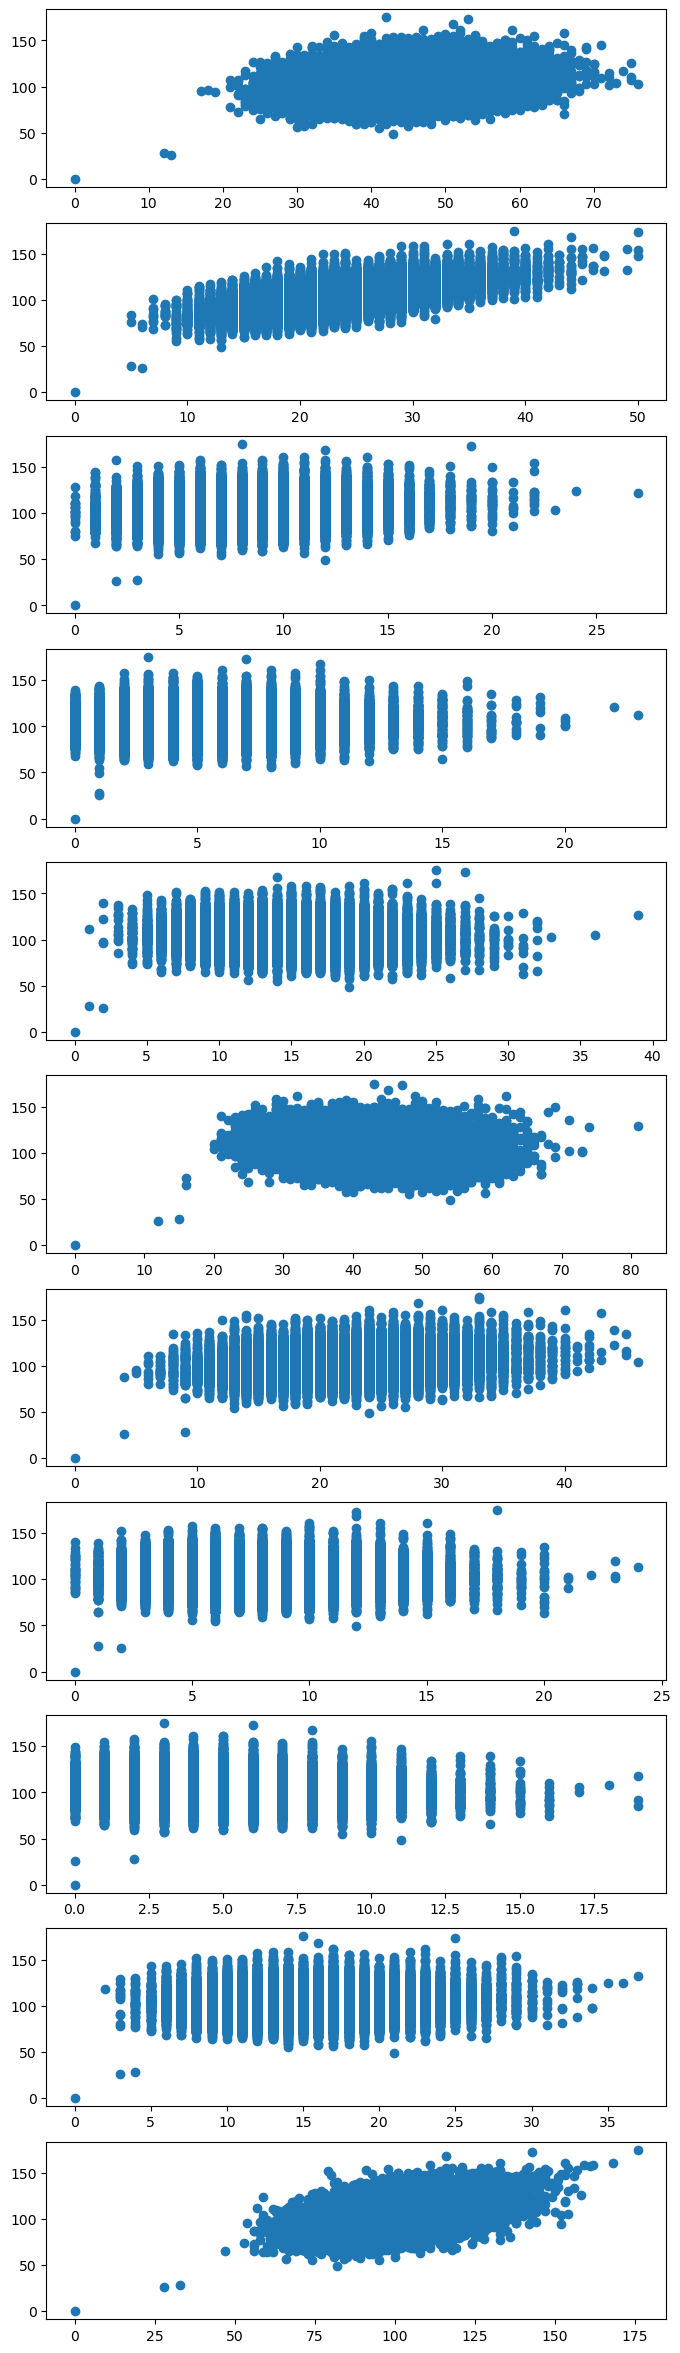

In [3]:
# Visualize the data
fig, ax = plt.subplots(11, figsize=(8,30))
#ax[0].scatter(df['fgm_home'], df['pts_home'])
#ax[1].scatter(df['fg3m_home'], df['pts_home'])
#ax[2].scatter(df['ftm_home'], df['pts_home'])
ax[0].scatter(df['reb_home'], df['pts_home'])
ax[1].scatter(df['ast_home'], df['pts_home'])
ax[2].scatter(df['stl_home'], df['pts_home'])
ax[3].scatter(df['blk_home'], df['pts_home'])
ax[4].scatter(df['tov_home'], df['pts_home'])
ax[5].scatter(df['reb_away'], df['pts_home'])
ax[6].scatter(df['ast_away'], df['pts_home'])
ax[7].scatter(df['stl_away'], df['pts_home'])
ax[8].scatter(df['blk_away'], df['pts_home'])
ax[9].scatter(df['tov_away'], df['pts_home'])
ax[10].scatter(df['pts_away'], df['pts_home'])
plt.show()

In [4]:
# Select only the numerical attributes
# Removed - 'fgm_home', 'fg3m_home', 'ftm_home', 'fgm_away', 'fg3m_away', 'ftm_away', 'pts_away'
df_X = df[['reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away']]
df_y = df['pts_home']

print(df_X.shape)
print(df_y.shape)

(41073, 10)
(41073,)


In [5]:
# Normalize the data using Z-score
df_X = (df_X - df_X.mean()) / df_X.std()

In [6]:
# Create the training and testing sets 
# Splitting between 1985-2015, and 2015-2023
X_train = df_X.iloc[:32248] 
X_test = df_X.iloc[32249:]

y_train = df_y.iloc[:32248]
y_test = df_y.iloc[32249:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32248, 10)
(8824, 10)
(32248,)
(8824,)


In [7]:
# Convert to numpy arrays
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

# Verify the data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32248, 10)
(32248,)
(8824, 10)
(8824,)


In [12]:
# Import the neural network functionality from scikit-learn
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error

# Create a linear regression model:
model = MLPRegressor(hidden_layer_sizes=(50, 50), activation='logistic', solver='sgd', max_iter=1000)

# Train the model on the traing data:
model.fit(X_train, y_train)

# Output the weight vector:
W_direct = model.coefs_
#print("Weight vector W: ", W_direct) # 10 values

# Predict the output values for the testing data:
y_pred = model.predict(X_test)

# Evaluate the model:
print("\nRegression Evaluation Metrics")
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred) * 100)
print("R^2 : ", model.score(X_test, y_test))

# Print the first 10 test and predicted values:
print()
print("First 10 values of Y_test: \n", y_test[0:10])
print()
print("First 10 values of Y_pred: \n", y_pred[0:10])


Regression Evaluation Metrics
RMSE:  12.225921827234028
MAPE:  8.59146456676538
R^2 :  0.12221515386437898

First 10 values of Y_test: 
 [126  98  92  87  81  91 106 111 109 101]

First 10 values of Y_pred: 
 [119.82558359 102.67618973  96.35529637  92.60480788  94.31677039
 109.47684706  99.92986437 107.86901137 102.31724707  95.39628923]
